In [377]:
import pandas as pd
import numpy as np
import osmnx as ox
import matplotlib.pyplot as plt
import random
from pathlib import Path
%matplotlib inline

In [358]:
%run A:\PyCodebase\Mapping\osmnx_extras.py

<Figure size 432x288 with 0 Axes>

# Random Walk Through Manhattan

First step is to load the data. This takes a while to run. 

In [16]:
G = ox.graph_from_place('Manhattan Island, New York City, New York, USA', network_type='drive')

Let's take a look:

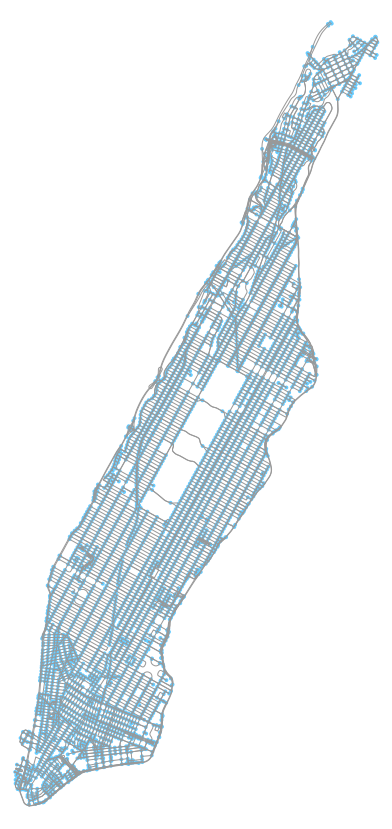

In [17]:
fig,ax = ox.plot_graph(G,fig_height = 15)

## Small Example

In [183]:
home = (40.763578, -73.963115)
G2 = ox.graph_from_point(home, distance=500,network_type='walk')

Take a look at the intersections.

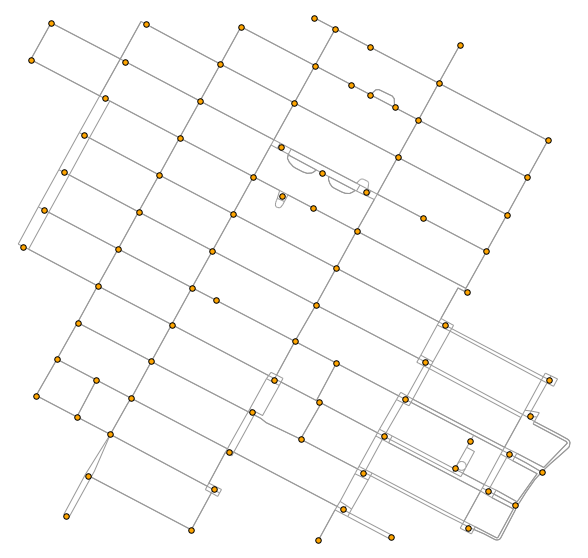

In [254]:
G2 = ox.project_graph(G2)
G2_clean = clean_intersections_graph(G2, tolerance=5, dead_ends=False)
fig, ax = plot_graph_mls(G2_clean, fig_height=10, node_color='orange',
node_size=30, node_zorder=2, node_edgecolor='k')

In [297]:
list(G2_clean.nodes)[:5]

[4918486728, 6293701619, 42424672, 42432861, 42443615]

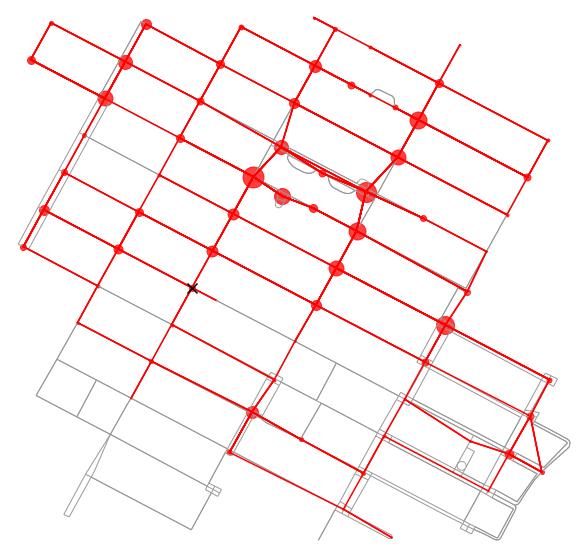

In [306]:
G2 = ox.project_graph(G2)
G2_clean = clean_intersections_graph(G2, tolerance=15, dead_ends=False)

def draw_random_walk(G,ax,loc,delay,steps):
    visited = {loc:1}
    edges = []
    
    for step in range(steps):
        neighbors = [z for z in G.neighbors(loc)]
        # choose where to go
        new_loc = random.choice(neighbors)
#         print(loc,neighbors)
        plt.plot([G.nodes[loc]['x'],G.nodes[new_loc]['x']],
                [G.nodes[loc]['y'],G.nodes[new_loc]['y']],color='red')
        edges.append([[G.nodes[loc]['x'],G.nodes[new_loc]['x']],[G.nodes[loc]['y'],G.nodes[new_loc]['y']]])
        loc = new_loc
        if loc in visited:
            visited[loc] += 1
        else:
            visited[loc] = 1
            
    return pd.Series(visited), edges
    
fig, ax = plot_graph_mls(G2_clean, fig_height=10, node_color='red',
node_size=0, node_zorder=2, node_edgecolor='k',show=True)
start = 42449982
freqs = draw_random_walk(G2_clean,ax,start,1,500)

for loc in freqs.index:
    ax.scatter(x=G2_clean.nodes[loc]['x'],y=G2_clean.nodes[loc]['y'],s=freqs[loc]**2,marker='o',alpha=.75,color='red')
    
_ = ax.scatter(x=G2_clean.nodes[start]['x'],y=G2_clean.nodes[start]['y'],s=100,marker='x',color='black',zorder=3)

## Big Example

Load the data

In [307]:
GB = ox.graph_from_place('Manhattan Island, New York City, New York, USA', network_type='walk')

preprocess

In [ ]:
GB = ox.project_graph(GB)
GB_clean = clean_intersections_graph(GB, tolerance=15, dead_ends=False)

take a look

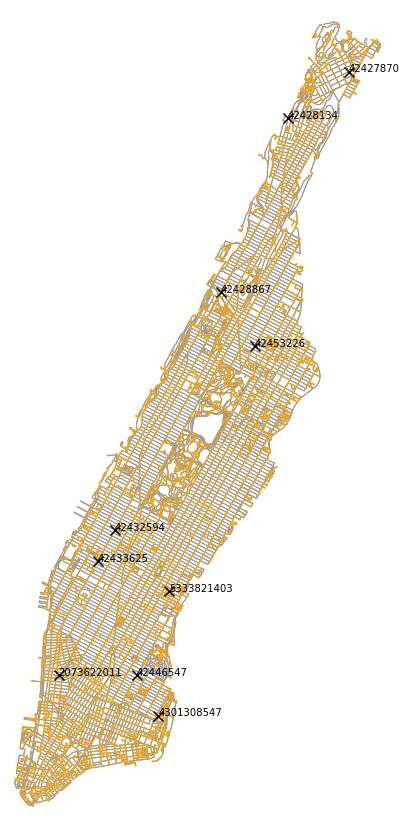

In [417]:
fig, ax = plot_graph_mls(GB_clean, fig_height=15, node_color='orange',
node_size=5, node_zorder=2,edge_linewidth=1)

nl = list(GB_clean.nodes)

for i in range(10):
    loc = random.choice(nl)
    _ = ax.scatter(x=GB_clean.nodes[loc]['x'],y=GB_clean.nodes[loc]['y']
                   ,s=100,marker='x',color='black',zorder=3,label=loc)
    ax.annotate(loc, (GB_clean.nodes[loc]['x'], GB_clean.nodes[loc]['y']))

find a starting point

In [418]:
list(GB_clean.nodes)[:5]

[4206998238, 2792083055, 1494150053, 607911351, 607914376]

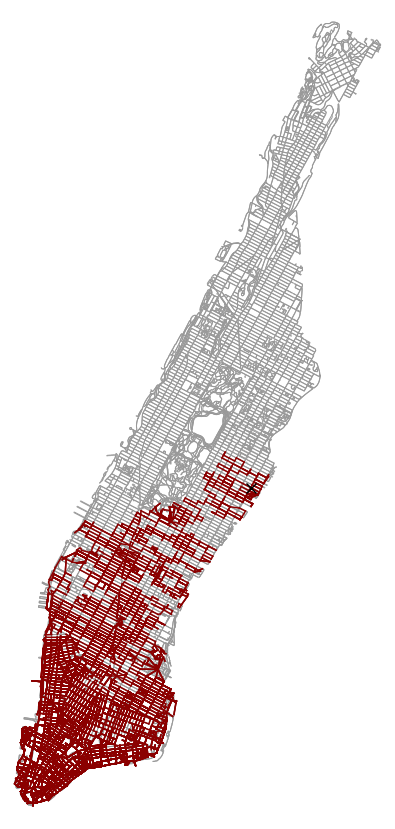

In [432]:
seed = 7
n_steps = 25000
snap_freq = 25
random.seed(seed)


# create folder                        
image_dir = os.path.join(r'C:\Users\sunny\Pictures\Projects\Manhattan',str(seed))
Path(image_dir).mkdir(parents=True, exist_ok=True)

# initial figure
fig, ax = plot_graph_mls(GB_clean, fig_height=15, node_color='red',
node_size=0, node_zorder=2, node_edgecolor='k',show=True)

# run the random walk
start =random.choice(list(GB_clean.nodes))
freqs,edges = draw_random_walk(GB_clean,ax,start,1,n_steps)

# starting point
_ = ax.scatter(x=GB_clean.nodes[start]['x'],y=GB_clean.nodes[start]['y'],s=100,marker='x',color='black',zorder=3)

# edges
i = 0
for edge in edges:
    if (i % snap_freq) == 0:
        fig.savefig(os.path.join(image_dir,'_'.join(
            [str(seed),str(i).rjust(int(np.log10(n_steps))+1,'0')+'.png'])))
    plt.plot(edge[0],edge[1], color='darkred')
    i += 1

# plot the hotspots
# for loc in freqs.index:
#     ax.scatter(x=GB_clean.nodes[loc]['x'],y=GB_clean.nodes[loc]['y'],
#                s=5./np.sqrt(n_steps)*freqs[loc]**2,marker='o',alpha=.5,color='darkred')

fig.savefig(os.path.join(image_dir,'_'.join([str(seed),str(i),'.png'])))

In [382]:
cwd = os.getcwd()
os.chdir(image_dir)
os.system('magick -delay 5 -loop 0 *.png animated.gif')
os.chdir(cwd)

In [386]:
os.chdir(image_dir)
os.getcwd()

'C:\\Users\\sunny\\Pictures\\Projects\\Manhattan\\7'

In [401]:
# # os.system('magick -delay 5 -loop 0 '+image_dir+'*.png animated.gif')
# cmd = 'magick -delay 5 -loop 0 '+image_dir+'\*.png animated.gif'

# import subprocess
# from subprocess import check_output

# try:
#     check_output(cmd, shell=True,stderr=subprocess.STDOUT)
# except subprocess.CalledProcessError as e:
#     raise RuntimeError("command '{}' return with error (code {}): {}".format(e.cmd, e.returncode, e.output))

In [392]:
'magick -delay 5 -loop 0 '+image_dir+'*.png animated.gif'

'magick -delay 5 -loop 0 C:\\Users\\sunny\\Pictures\\Projects\\Manhattan\\7*.png animated.gif'

In [391]:
print(image_dir)

C:\Users\sunny\Pictures\Projects\Manhattan\7
